# Nutrition Facts for McDonald's Menu

## 1. Business Understanding and Analytic Approach
Analyze nutrition facts in McDonald's Menu to identify correlation between nutrient value in McDonald's menu and calories 

## 2. Data Collection, Understanding and Preparaton

### a. Data Collection

Data Name: Nutrition Facts for McDonald's Menu  
Source: Kaggle  
Link: https://www.kaggle.com/datasets/mcdonalds/nutrition-facts/data

### b. Data Understanding

**Content**  
This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

**Acknowledgement**  
The menu items and nutrition facts were scraped from the McDonald's website.

#### Set up

In [61]:
!pip install --user ipython-sql

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
# from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

## 3. Data Loading

In [63]:
# Load Data into Pandas Dataframe

mcd_data = pd.read_csv("mcdonalds_menu.csv")

In [64]:
# Rename Data Columns

mcd_data.rename(columns={'Category': 'category',
                         'Item': 'item',
                         'Serving Size': 'serving_size',
                         'Calories': 'calories',
                         'Calories from Fat': 'calo_from_fat',
                         'Total Fat': 'total_fat',
                         'Total Fat (% Daily Value)': 'total_fat_dv',
                         'Saturated Fat': 'saturated_fat', 
                         'Saturated Fat (% Daily Value)': 'saturated_fat_dv',
                         'Trans Fat': 'trans_fat',
                         'Cholesterol': 'cholesterol',
                         'Cholesterol (% Daily Value)': 'cholesterol_dv',
                         'Sodium': 'sodium',
                         'Sodium (% Daily Value)': 'sodium_dv',
                         'Carbohydrates': 'carb',
                         'Carbohydrates (% Daily Value)': 'carb_dv',
                         'Dietary Fiber': 'fiber',
                         'Dietary Fiber (% Daily Value)': 'fiber_dv',
                         'Sugars': 'sugar',
                         'Protein': 'protein',
                         'Vitamin A (% Daily Value)': 'vitamin_a_dv',
                         'Vitamin C (% Daily Value)': 'vitamin_c_dv',
                         'Calcium (% Daily Value)': 'calcium_dv',
                         'Iron (% Daily Value)': 'iron_dv'},
                         inplace=True)

In [65]:
# Reset index and show a first few row of data

mcd_data.reset_index()
mcd_data.head(3)

,category,item,serving_size,calories,calo_from_fat,total_fat,total_fat_dv,saturated_fat,saturated_fat_dv,trans_fat,...,carb,carb_dv,fiber,fiber_dv,sugar,protein,vitamin_a_dv,vitamin_c_dv,calcium_dv,iron_dv
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10


Load dataframe into database

In [66]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [67]:
conn = sqlite3.connect('ADY201m-lab.db')
cur = conn.cursor()

In [68]:
# Load data into database

cur.execute("DROP TABLE IF EXISTS McDonalds_Menu")
mcd_data.to_sql('McDonalds_Menu', conn)

260

## 4. Data Wragling
- Handle Missing Values
- Correct Data Format
- Data Standardization
- Data Normalization
- Bining and Bins Visulization
- Indicator Variables/

### Handle Missing Values

In [69]:
# Check for missing values in DataFrame

mcd_data.isnull().sum()

category            0
item                0
serving_size        0
calories            0
calo_from_fat       0
total_fat           0
total_fat_dv        0
saturated_fat       0
saturated_fat_dv    0
trans_fat           0
cholesterol         0
cholesterol_dv      0
sodium              0
sodium_dv           0
carb                0
carb_dv             0
fiber               0
fiber_dv            0
sugar               0
protein             0
vitamin_a_dv        0
vitamin_c_dv        0
calcium_dv          0
iron_dv             0
dtype: int64

There are not missing values in this database so we don't have to handle missing values in this case.

### Correct Data Format

In [70]:
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          260 non-null    object 
 1   item              260 non-null    object 
 2   serving_size      260 non-null    object 
 3   calories          260 non-null    int64  
 4   calo_from_fat     260 non-null    int64  
 5   total_fat         260 non-null    float64
 6   total_fat_dv      260 non-null    int64  
 7   saturated_fat     260 non-null    float64
 8   saturated_fat_dv  260 non-null    int64  
 9   trans_fat         260 non-null    float64
 10  cholesterol       260 non-null    int64  
 11  cholesterol_dv    260 non-null    int64  
 12  sodium            260 non-null    int64  
 13  sodium_dv         260 non-null    int64  
 14  carb              260 non-null    int64  
 15  carb_dv           260 non-null    int64  
 16  fiber             260 non-null    int64  
 1

### Data Standardization

We have 2 kinds of serving size present in the column 'serving-size' stored in datatype object
- oz/g for foods 
- fl oz/ml for beverages

In [71]:
mcd_data['serving_size'].head()

0    4.8 oz (136 g)
1    4.8 oz (135 g)
2    3.9 oz (111 g)
3    5.7 oz (161 g)
4    5.7 oz (161 g)
Name: serving_size, dtype: object

We bring these into a same measurement unit

In [72]:
# Formating serving size in oz/ fl oz

serving_size_st = []
outliers = []
index = 0
for serving_size in mcd_data['serving_size']:
    if 'fl oz' in serving_size:
        idx = serving_size.find('fl oz')
        serve = float(serving_size[:idx])
        serving_size_st.append(serve)
        index+=1
    elif 'oz' in serving_size:
        idx = serving_size.find('oz')
        serve = float(serving_size[:idx])
        serving_size_st.append(serve)
        index+=1
    else:
        serving_size_st.append(0)
        outliers.append(index)
        index+=1

serving_size_data = mcd_data['serving_size']
print('Outliers that need to be handled manually')
for i in outliers:
    print(serving_size_data.iloc[i])

Outliers that need to be handled manually
1 cookie (33 g)
1 cookie (33 g)
1 carton (236 ml)
1 carton (236 ml)


In [73]:
# Handle outliers

## 1 g = 0.035274 oz
## 1 ml = 0.033814 fl oz
for i in outliers:
    if serving_size_data.iloc[i] == "1 cookie (33 g)":
        serving_size_st[i] = round(33 * 0.035274, 2)
    elif serving_size_data.iloc[i] == "1 carton (236 ml)":
        serving_size_st[i] = round(236 * 0.033814, 2)

In [74]:
# Add formatted serving size in DataFrame
try: 
    mcd_data['serving-size-st'] = serving_size_st
except ValueError:
    print('Columns added to DataFrame')

In [75]:
mcd_data.drop('serving_size', axis=1, inplace=True)

### Bining & Bins Visualization

#### Bining Caloric-Content 

Bining the 'calories' attribute into 3 groups 'low-calo', 'med-calo', 'high-calo'

Text(0.5, 1.0, 'calories bins')

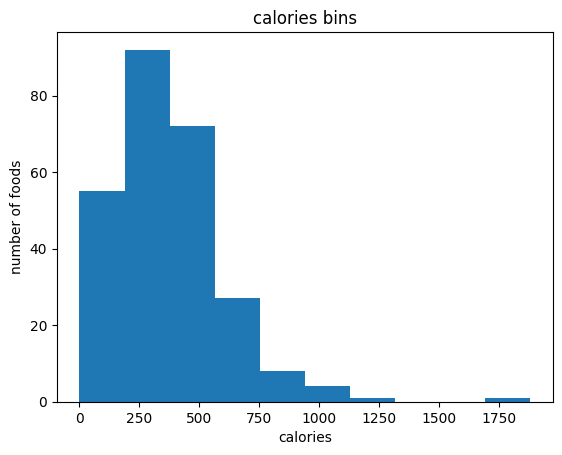

In [76]:
# Visulize the distribution of caloric content in MC-Donald's menu

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(mcd_data["calories"])

# set x/y labels and plot title
plt.pyplot.xlabel("calories")
plt.pyplot.ylabel("number of foods")
plt.pyplot.title("calories bins")

Depend on dietary guidelines, we specify the range of calories bins as:
- low calories: fewer than 100 calories per serving
- medium calories: from 100 to 300 calories perserving
- high calories: 300 calories and above per serving

In [77]:
calo_bins = np.array([0., 100., 300., max(mcd_data['calories'])])

In [78]:
caloric_binned_labels=['low-calo', 'med-calo', 'high-calo']

mcd_data['caloric-binned'] = pd.cut(mcd_data['calories'], calo_bins, labels=caloric_binned_labels, include_lowest=True )
mcd_data[['calories','caloric-binned']].head()

,calories,caloric-binned
0,300,med-calo
1,250,med-calo
2,370,high-calo
3,450,high-calo
4,400,high-calo


In [79]:
mcd_data['caloric-binned'].value_counts(sort=False)

caloric-binned
low-calo      26
med-calo      90
high-calo    144
Name: count, dtype: int64

Text(0.5, 1.0, 'calories bins')

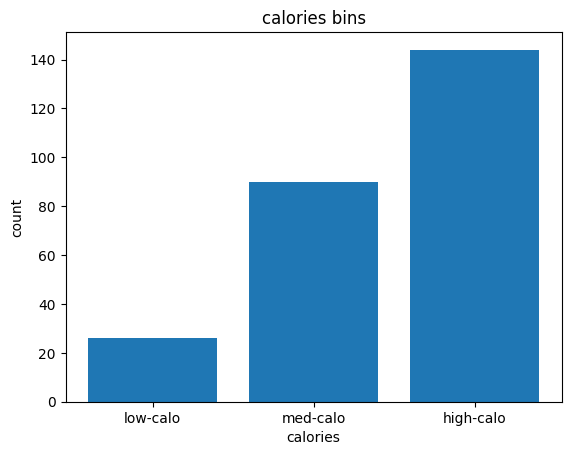

In [80]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(caloric_binned_labels, mcd_data["caloric-binned"].value_counts(sort=False))

# set x/y labels and plot title
plt.pyplot.xlabel("calories")
plt.pyplot.ylabel("count")
plt.pyplot.title("calories bins")

We can see that most of the food in the MCDonald's menu contain high caloric-content.

#### Bining Type of Serving

Bining the serving size into 3 groups 'small-serving', 'medium-serving' and 'large-serving'

Typical measurements for large, medium, and small portions in ounces:
- 4-8 oz/ fl oz: small 
- 8-16 oz/fl oz: medium
- 16-24 oz/fl oz: large

In [81]:
serving_bins = np.array([0., 8., 16., max(mcd_data['serving-size-st'])])
serving_bins

array([ 0.,  8., 16., 32.])

In [82]:
serving_binned_labels=['small-serving', 'med-serving', 'large-serving']

mcd_data['serving-binned'] = pd.cut(mcd_data['serving-size-st'], serving_bins, labels=serving_binned_labels, include_lowest=True )
mcd_data[['serving-size-st','serving-binned']].head()

,serving-size-st,serving-binned
0,4.8,small-serving
1,4.8,small-serving
2,3.9,small-serving
3,5.7,small-serving
4,5.7,small-serving


In [83]:
mcd_data['serving-binned'].value_counts(sort=False)

serving-binned
small-serving     81
med-serving      121
large-serving     58
Name: count, dtype: int64

Text(0.5, 1.0, 'serving size bins')

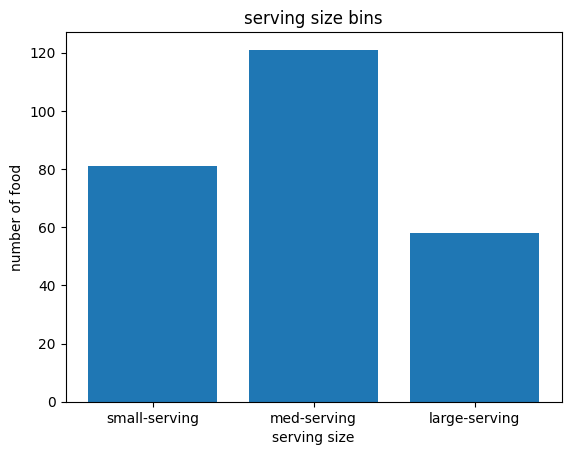

In [84]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(serving_binned_labels, mcd_data["serving-binned"].value_counts(sort=False))

# set x/y labels and plot title
plt.pyplot.xlabel("serving size")
plt.pyplot.ylabel("number of food")
plt.pyplot.title("serving size bins")

### Data Normalization

In [85]:
# Using Simple Feature Scaling for columns in DataFrame

def scaling(df, columns):
    df[columns] = df[columns]/df[columns].max()
    return df

In [86]:
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          260 non-null    object  
 1   item              260 non-null    object  
 2   calories          260 non-null    int64   
 3   calo_from_fat     260 non-null    int64   
 4   total_fat         260 non-null    float64 
 5   total_fat_dv      260 non-null    int64   
 6   saturated_fat     260 non-null    float64 
 7   saturated_fat_dv  260 non-null    int64   
 8   trans_fat         260 non-null    float64 
 9   cholesterol       260 non-null    int64   
 10  cholesterol_dv    260 non-null    int64   
 11  sodium            260 non-null    int64   
 12  sodium_dv         260 non-null    int64   
 13  carb              260 non-null    int64   
 14  carb_dv           260 non-null    int64   
 15  fiber             260 non-null    int64   
 16  fiber_dv          260 non-

In [87]:
mcd_data.head()

,category,item,calories,calo_from_fat,total_fat,total_fat_dv,saturated_fat,saturated_fat_dv,trans_fat,cholesterol,...,fiber_dv,sugar,protein,vitamin_a_dv,vitamin_c_dv,calcium_dv,iron_dv,serving-size-st,caloric-binned,serving-binned
0,Breakfast,Egg McMuffin,300,120,13.0,20,5.0,25,0.0,260,...,17,3,17,10,0,25,15,4.8,med-calo,small-serving
1,Breakfast,Egg White Delight,250,70,8.0,12,3.0,15,0.0,25,...,17,3,18,6,0,25,8,4.8,med-calo,small-serving
2,Breakfast,Sausage McMuffin,370,200,23.0,35,8.0,42,0.0,45,...,17,2,14,8,0,25,10,3.9,high-calo,small-serving
3,Breakfast,Sausage McMuffin with Egg,450,250,28.0,43,10.0,52,0.0,285,...,17,2,21,15,0,30,15,5.7,high-calo,small-serving
4,Breakfast,Sausage McMuffin with Egg Whites,400,210,23.0,35,8.0,42,0.0,50,...,17,2,21,6,0,25,10,5.7,high-calo,small-serving


In [88]:
mcd_data.iloc[:,2:-2] = mcd_data.iloc[:,2:-2].apply(lambda x: x/ x.max(), axis=0)

mcd_data.head()

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_22100\1122205861.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.159574
1      0.132979
2      0.196809
3      0.239362
4      0.212766
         ...   
255    0.271277
256    0.367021
257    0.180851
258    0.430851
259    0.218085
Name: calories, Length: 260, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mcd_data.iloc[:,2:-2] = mcd_data.iloc[:,2:-2].apply(lambda x: x/ x.max(), axis=0)
C:\Users\aDMIN\AppData\Local\Temp\ipykernel_22100\1122205861.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0.113208
1      0.066038
2      0.188679
3      0.235849
4      0.198113
         ...   
255    0.141509
256    0.188679
257    0.094340
258    0.273585
259    0.141509
Name: calo_from_fat, Length: 260, dtype: float64' has dtype in

,category,item,calories,calo_from_fat,total_fat,total_fat_dv,saturated_fat,saturated_fat_dv,trans_fat,cholesterol,...,fiber_dv,sugar,protein,vitamin_a_dv,vitamin_c_dv,calcium_dv,iron_dv,serving-size-st,caloric-binned,serving-binned
0,Breakfast,Egg McMuffin,0.159574,0.113208,0.110169,0.109890,0.25,0.245098,0.0,0.452174,...,0.607143,0.023438,0.195402,0.058824,0.0,0.357143,0.375,0.150000,med-calo,small-serving
1,Breakfast,Egg White Delight,0.132979,0.066038,0.067797,0.065934,0.15,0.147059,0.0,0.043478,...,0.607143,0.023438,0.206897,0.035294,0.0,0.357143,0.200,0.150000,med-calo,small-serving
2,Breakfast,Sausage McMuffin,0.196809,0.188679,0.194915,0.192308,0.40,0.411765,0.0,0.078261,...,0.607143,0.015625,0.160920,0.047059,0.0,0.357143,0.250,0.121875,high-calo,small-serving
3,Breakfast,Sausage McMuffin with Egg,0.239362,0.235849,0.237288,0.236264,0.50,0.509804,0.0,0.495652,...,0.607143,0.015625,0.241379,0.088235,0.0,0.428571,0.375,0.178125,high-calo,small-serving
4,Breakfast,Sausage McMuffin with Egg Whites,0.212766,0.198113,0.194915,0.192308,0.40,0.411765,0.0,0.086957,...,0.607143,0.015625,0.241379,0.035294,0.0,0.357143,0.250,0.178125,high-calo,small-serving


### Addition Attribute

In [89]:
# Adding 'mineral-content' attribute to the dataframe

mcd_data['mineral-content_dv'] = mcd_data['vitamin_a_dv'] + mcd_data['vitamin_c_dv'] + mcd_data['calcium_dv'] + mcd_data['iron_dv']

# Normalizing this attribute

mcd_data['mineral-content_dv'] = mcd_data['mineral-content_dv']/ mcd_data['mineral-content_dv'].max()

In [90]:
# add 'calories_dv' attribute to the dataframe

mcd_data['calories_dv'] = (mcd_data['calories']*100)/2000

# Normalizing this attribute

mcd_data['calories_dv'] = mcd_data['calories_dv']/mcd_data['calories_dv'].max()

## 5. Data Exploration & Visualization
- Visualization Relationship and Correlation
- Descriptive Statistic

In [93]:
mcd_data.head()

,category,item,calories,calo_from_fat,total_fat,total_fat_dv,saturated_fat,saturated_fat_dv,trans_fat,cholesterol,...,protein,vitamin_a_dv,vitamin_c_dv,calcium_dv,iron_dv,serving-size-st,caloric-binned,serving-binned,mineral-content_dv,calories_dv
0,Breakfast,Egg McMuffin,0.159574,0.113208,0.110169,0.109890,0.25,0.245098,0.0,0.452174,...,0.195402,0.058824,0.0,0.357143,0.375,0.150000,med-calo,small-serving,0.461397,0.159574
1,Breakfast,Egg White Delight,0.132979,0.066038,0.067797,0.065934,0.15,0.147059,0.0,0.043478,...,0.206897,0.035294,0.0,0.357143,0.200,0.150000,med-calo,small-serving,0.345588,0.132979
2,Breakfast,Sausage McMuffin,0.196809,0.188679,0.194915,0.192308,0.40,0.411765,0.0,0.078261,...,0.160920,0.047059,0.0,0.357143,0.250,0.121875,high-calo,small-serving,0.381618,0.196809
3,Breakfast,Sausage McMuffin with Egg,0.239362,0.235849,0.237288,0.236264,0.50,0.509804,0.0,0.495652,...,0.241379,0.088235,0.0,0.428571,0.375,0.178125,high-calo,small-serving,0.520221,0.239362
4,Breakfast,Sausage McMuffin with Egg Whites,0.212766,0.198113,0.194915,0.192308,0.40,0.411765,0.0,0.086957,...,0.241379,0.035294,0.0,0.357143,0.250,0.178125,high-calo,small-serving,0.374755,0.212766


### Visulization Data

#### Categorical Variable

Using boxplot for visulization of relationship between categorical variables and others

[Text(0.5, 1.0, 'Relationship Between Calories and Sodium Content')]

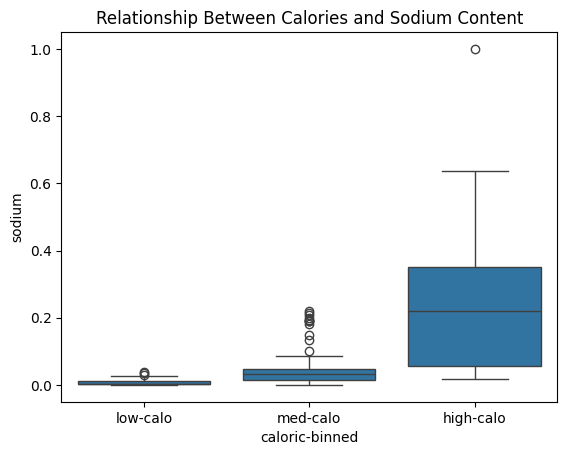

In [92]:
sns.boxplot(x='caloric-binned', y='sodium', data=mcd_data).set(title='Relationship Between Calories and Sodium Content')

Caloric content might be a good predictor for the sodium content in McDonald's food

[Text(0.5, 1.0, 'Serving Portion and Caloric Content')]

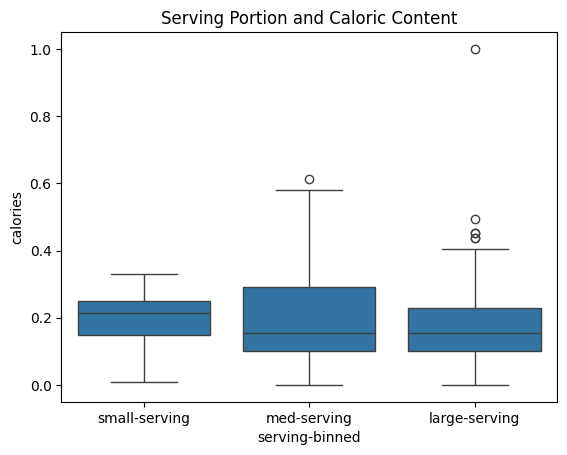

In [31]:
sns.boxplot(x='serving-binned', y='calories', data=mcd_data).set(title='Serving Portion and Caloric Content')

<p> We see that the distributions of price between the different serving size categories have a significant overlap, so serving size would not be a good predictor of calories amount in food.</p>
<p> Be careful when think that 'a peice of McDonald's cake won't hurt'!!! >< </p>

#### Continuous Numerical Variable

A great way to visualize these variables is by using scatterplots with fitted lines.


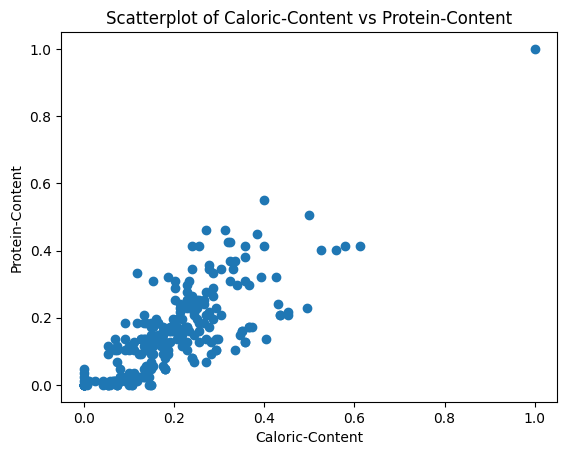

In [73]:
# The correlation between protein and calories in McDonald's menu

x = mcd_data['calories']
y = mcd_data['protein']

plt.pyplot.scatter(x,y)

plt.pyplot.title('Scatterplot of Caloric-Content vs Protein-Content')
plt.pyplot.xlabel('Caloric-Content')
plt.pyplot.ylabel('Protein-Content')
plt.pyplot.show()

Calories amount might be a good predictor for protein amount. We can check their correlation

In [39]:
mcd_data[['calories', 'protein']].corr()

,calories,protein
calories,1.000000,0.787847
protein,0.787847,1.000000


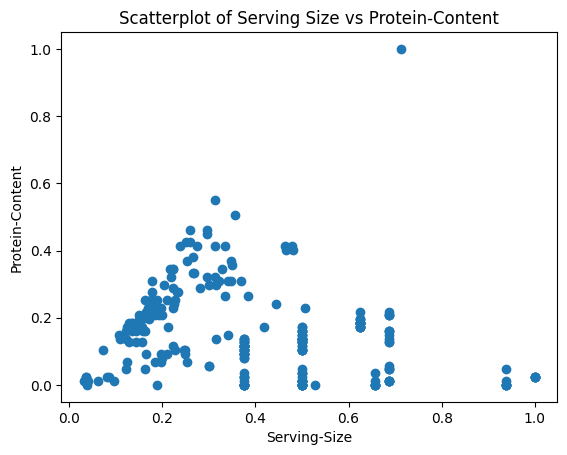

In [76]:
x = mcd_data['serving-size-st']
y = mcd_data['protein']

plt.pyplot.scatter(x,y)

plt.pyplot.title('Scatterplot of Serving Size vs Protein-Content')
plt.pyplot.xlabel('Serving-Size')
plt.pyplot.ylabel('Protein-Content')
plt.pyplot.show()

But serving size might not, by observing from ther graph we assume that it is not the case that the more calories you eat the more protein you're getting.  
We verify our assumption by their correlation.

In [41]:
mcd_data[['serving-size-st', 'protein']].corr()

,serving-size-st,protein
serving-size-st,1.000000,-0.253087
protein,-0.253087,1.000000


Group 'category' and 'serving size' to get the avg calories amount contain in each group

In [42]:
df_test = mcd_data[['category', 'serving-binned', 'calories']]
df_grp = df_test.groupby(['category', 'serving-binned'], as_index=False).mean()

df_grp.head(3)

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_4896\765854228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grp = df_test.groupby(['category', 'serving-binned'], as_index=False).mean()


,category,serving-binned,calories
0,Beef & Pork,small-serving,0.231625
1,Beef & Pork,med-serving,0.348404
2,Beef & Pork,large-serving,NaN


In [35]:
df_grp.isnull().sum()

category          0
serving-binned    0
calories          8
dtype: int64

In [36]:
df_grp.dropna(axis=0, inplace=True)
df_grp.head()

,category,serving-binned,calories
0,Beef & Pork,small-serving,0.231625
1,Beef & Pork,med-serving,0.348404
3,Beverages,small-serving,0.054965
4,Beverages,med-serving,0.046986
5,Beverages,large-serving,0.075355


In [43]:
df_pivot = df_grp.pivot(index='serving-binned', columns='category')

C:\Users\aDMIN\AppData\Local\Temp\ipykernel_4896\801932618.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.pyplot.colorbar()


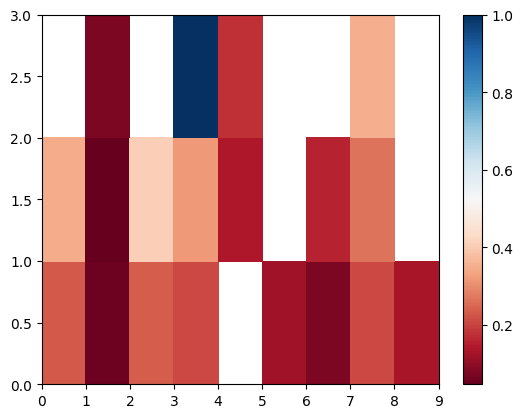

In [44]:
plt.pyplot.pcolor(df_pivot, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()

### Descriptive Statistic
- Basic Statistic
- Pearson Correlation

In [48]:
mcd_data.describe(include='all')

,category,item,calories,calo_from_fat,total_fat,total_fat_dv,saturated_fat,saturated_fat_dv,trans_fat,cholesterol,...,sugar,protein,vitamin_a_dv,vitamin_c_dv,calcium_dv,iron_dv,serving-size-st,caloric-binned,serving-binned,mineral-content_dv
count,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260,260,260.000000
unique,9,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN
top,Coffee & Tea,Egg McMuffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high-calo,med-serving,NaN
freq,95,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,121,NaN
mean,NaN,NaN,0.195888,0.119902,0.120046,0.119865,0.300385,0.293778,0.081538,0.095552,...,0.229868,0.153316,0.078982,0.035561,0.299615,0.193365,0.401813,NaN,NaN,0.354389
std,NaN,NaN,0.127803,0.120638,0.120390,0.120248,0.266094,0.261169,0.171653,0.151773,...,0.224061,0.131335,0.143332,0.109773,0.243142,0.218082,0.218387,NaN,NaN,0.229469
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,NaN,NaN,0.000000
25%,NaN,NaN,0.111702,0.018868,0.020127,0.020604,0.050000,0.046569,0.000000,0.008696,...,0.044922,0.045977,0.011765,0.000000,0.085714,0.000000,0.217969,NaN,NaN,0.208512
50%,NaN,NaN,0.180851,0.094340,0.093220,0.093407,0.250000,0.235294,0.000000,0.060870,...,0.136719,0.137931,0.047059,0.000000,0.285714,0.100000,0.375000,NaN,NaN,0.353799
75%,NaN,NaN,0.265957,0.188679,0.188559,0.192308,0.500000,0.470588,0.000000,0.113043,...,0.375000,0.218391,0.088235,0.016667,0.428571,0.375000,0.500000,NaN,NaN,0.502083


**Peason Correlation**

Let's calculate the  Pearson Correlation Coefficient and P-value of 'mineral-content_dv' and 'calories_dv'.

In [52]:
from scipy import stats

In [53]:
pearson_coef, p_value = stats.pearsonr(mcd_data['mineral-content_dv'], mcd_data['calories_dv'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6420581338576866  with a P-value of P = 1.2963354098349615e-31


Since the P-value indicates a very small value (close to 0) and the Pearson Correlation Coefficient is ~0,642, it is a strong certainty that these 2 attributes have a medium-large positive relationship

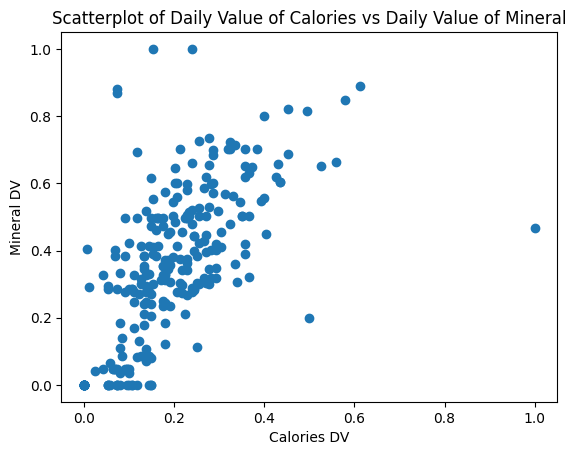

In [54]:
x = mcd_data['calories_dv']
y = mcd_data['mineral-content_dv']

plt.pyplot.scatter(x,y)

plt.pyplot.title('Scatterplot of Daily Value of Calories vs Daily Value of Mineral')
plt.pyplot.xlabel('Calories DV')
plt.pyplot.ylabel('Mineral DV')
plt.pyplot.show()

## 6. Regression Analysis

In [56]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

x = mcd_data[['calories']]
y = mcd_data[['protein']]

lm.fit(x,y)

yhat = lm.predict(x)

(0.0, 1.0511439421650466)

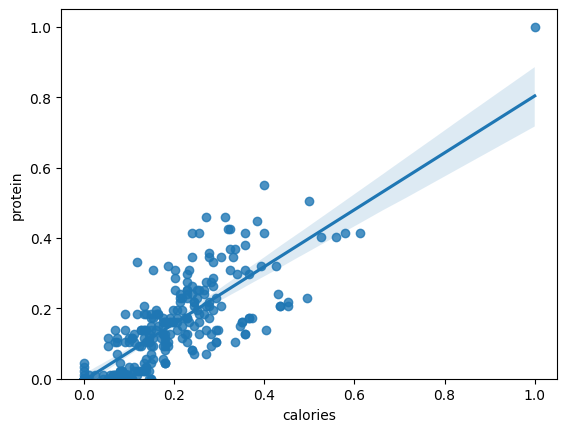

In [57]:
sns.regplot(x='calories', y='protein', data=mcd_data)
plt.pyplot.ylim(0,)

<Axes: xlabel='calories', ylabel='protein'>

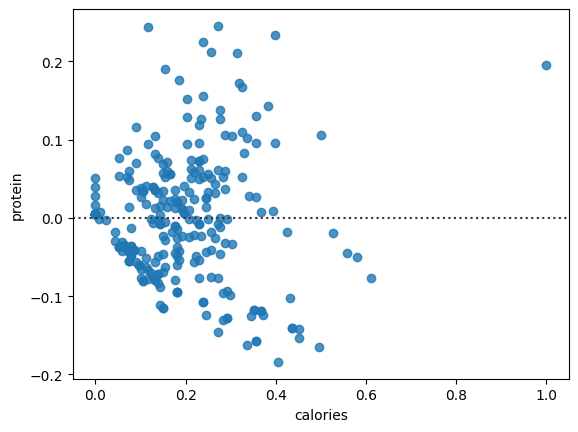

In [98]:
import seaborn as sns

sns.residplot(data=mcd_data, x=mcd_data['calories'], y=mcd_data['protein'])

In [58]:
lm.score(x,y)

0.62070360737898

## 7. Model Evaluating

In [61]:
mcd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   category            260 non-null    object  
 1   item                260 non-null    object  
 2   calories            260 non-null    float64 
 3   calo_from_fat       260 non-null    float64 
 4   total_fat           260 non-null    float64 
 5   total_fat_dv        260 non-null    float64 
 6   saturated_fat       260 non-null    float64 
 7   saturated_fat_dv    260 non-null    float64 
 8   trans_fat           260 non-null    float64 
 9   cholesterol         260 non-null    float64 
 10  cholesterol_dv      260 non-null    float64 
 11  sodium              260 non-null    float64 
 12  sodium_dv           260 non-null    float64 
 13  carb                260 non-null    float64 
 14  carb_dv             260 non-null    float64 
 15  fiber               260 non-null    floa

In [62]:
y_data = mcd_data['protein']
x_data = mcd_data[['serving-size-st','calories']]

In [63]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 26
number of training samples: 234


In [65]:
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test)

(0.0, 0.4623874346143053)

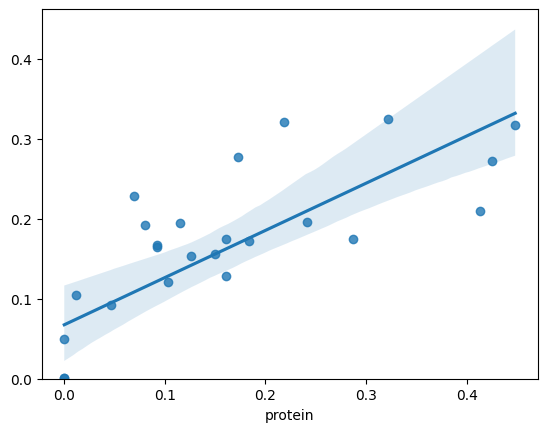

In [66]:
sns.regplot(x=y_test, y=predictions)
plt.pyplot.ylim(0,)